In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head()

,states,districts,variable,Unit,Date,Value
0,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-01-2010,0.3
1,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-02-2010,0.0
2,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-03-2010,0.0
3,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-04-2010,0.0
4,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-05-2010,0.0


In [5]:
df.tail()

,states,districts,variable,Unit,Date,Value
127,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-08-2020,407.0
128,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-09-2020,121.9
129,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-10-2020,7.6
130,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-11-2020,0.2
131,Rajasthan,Udaipur,Rainfall (mm.),Millimetres,01-12-2020,0.5


In [6]:
df.drop(df.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df.head()

,Date,Value
0,01-01-2010,0.3
1,01-02-2010,0.0
2,01-03-2010,0.0
3,01-04-2010,0.0
4,01-05-2010,0.0


In [7]:
df.columns=["Date","Value"]
df.head()

,Date,Value
0,01-01-2010,0.3
1,01-02-2010,0.0
2,01-03-2010,0.0
3,01-04-2010,0.0
4,01-05-2010,0.0


In [8]:
df['Date']=pd.to_datetime(df['Date'],  format='%d-%m-%Y', dayfirst=True)

In [9]:
df.head()

,Date,Value
0,2010-01-01,0.3
1,2010-02-01,0.0
2,2010-03-01,0.0
3,2010-04-01,0.0
4,2010-05-01,0.0


In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.head()

,Value
Date,
2010-01-01,0.3
2010-02-01,0.0
2010-03-01,0.0
2010-04-01,0.0
2010-05-01,0.0


<AxesSubplot:xlabel='Date'>

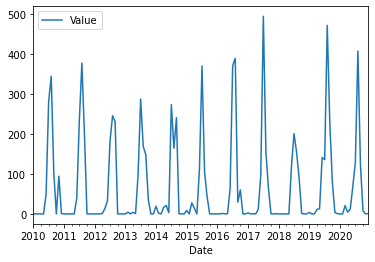

In [12]:
df.plot()

In [13]:
from pmdarima.arima import ADFTest 
adf_test = ADFTest(alpha = 0.05) 
adf_test.should_diff(df)

(0.01, False)

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(df['Value'])

ADF Test Statistic : -2.9192061653136365
p-value : 0.04315973392525896
#Lags Used : 11
Number of Observations Used : 120
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [17]:
df['First Difference'] = df['Value'] - df['Value'].shift(1)

In [18]:
df['Value'].shift(1)

Date
2010-01-01      NaN
2010-02-01      0.3
2010-03-01      0.0
2010-04-01      0.0
2010-05-01      0.0
              ...  
2020-08-01    128.4
2020-09-01    407.0
2020-10-01    121.9
2020-11-01      7.6
2020-12-01      0.2
Name: Value, Length: 132, dtype: float64

In [19]:
df['Seasonal First Difference']=df['Value']-df['Value'].shift(12)

In [20]:
df.head(20)

,Value,First Difference,Seasonal First Difference
Date,,,
2010-01-01,0.3,NaN,NaN
2010-02-01,0.0,-0.3,NaN
2010-03-01,0.0,0.0,NaN
2010-04-01,0.0,0.0,NaN
2010-05-01,0.0,0.0,NaN
2010-06-01,49.6,49.6,NaN
2010-07-01,280.8,231.2,NaN
2010-08-01,343.8,63.0,NaN
2010-09-01,104.1,-239.7,NaN


In [21]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.402375786755307
p-value : 1.8947515284875764e-18
#Lags Used : 0
Number of Observations Used : 119
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

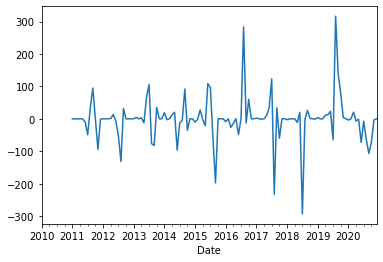

In [22]:
df['Seasonal First Difference'].plot()

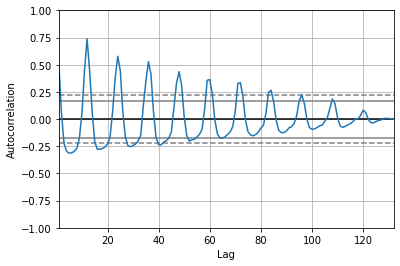

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

In [24]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [43]:
import warnings

warnings.filterwarnings("ignore")

model=ARIMA(df['Value'],order=(2,1,2))
model_fit=model.fit()

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -771.028
Method:                       css-mle   S.D. of innovations             82.982
Date:                Tue, 19 Oct 2021   AIC                           1554.057
Time:                        09:18:14   BIC                           1571.308
Sample:                    02-01-2010   HQIC                          1561.067
                         - 12-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0348      0.033      1.062      0.288      -0.029       0.099
ar.L1.D.Value     1.3501      0.067     20.179      0.000       1.219       1.481
ar.L2.D.Value    -0.6338      0.066     -9.554      0.000      -0.764      -0.504
ma.L1.D.Value    -1.9949      0.068    -29.362      0.000      -2.128      -1.862
ma.L2.D.Value     0.9954      0.068     14.655      0.000       0.862       1.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0650           -0.6659j            1.2561           -0.0889
AR.2            1.0650           +0.6659j            1.2561            0.0889
MA.1            1.0021           -0.0216j            1.0023           -0.0034
MA.2            1.0021           +0.0216j            1.0023            0.0034
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

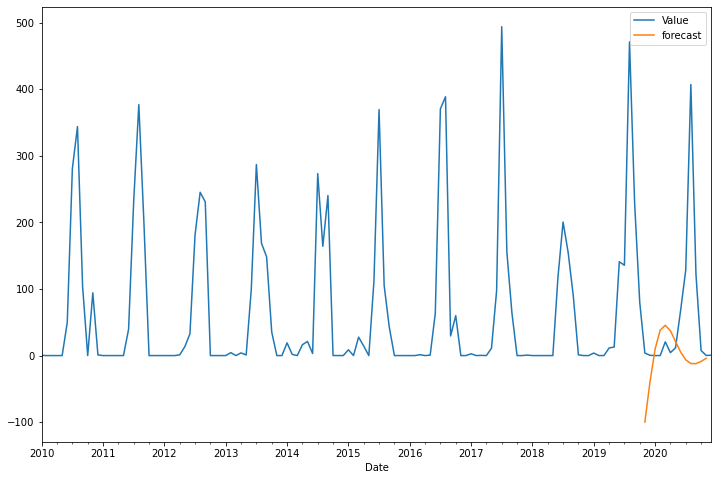

In [45]:
df['forecast']=model_fit.predict(start=118,end=130,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [46]:
import statsmodels.api as sm

In [47]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='Date'>

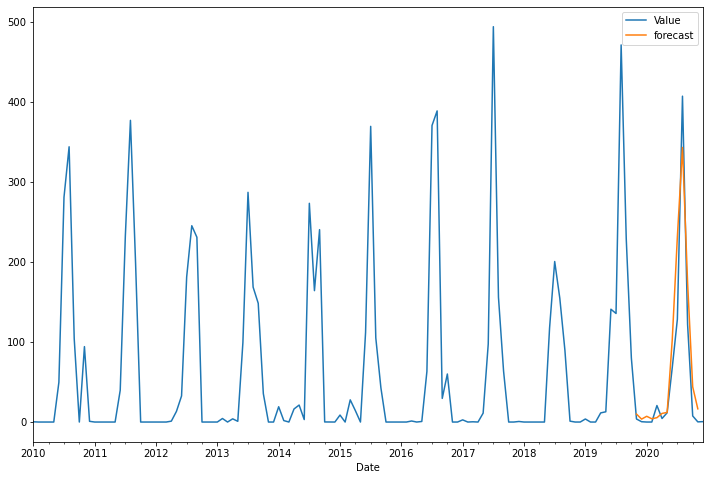

In [48]:
df['forecast']=results.predict(start=118,end=130,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [49]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [50]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [51]:
future_datest_df.tail()

,Value,First Difference,Seasonal First Difference,forecast
2022-07-01,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN


In [52]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

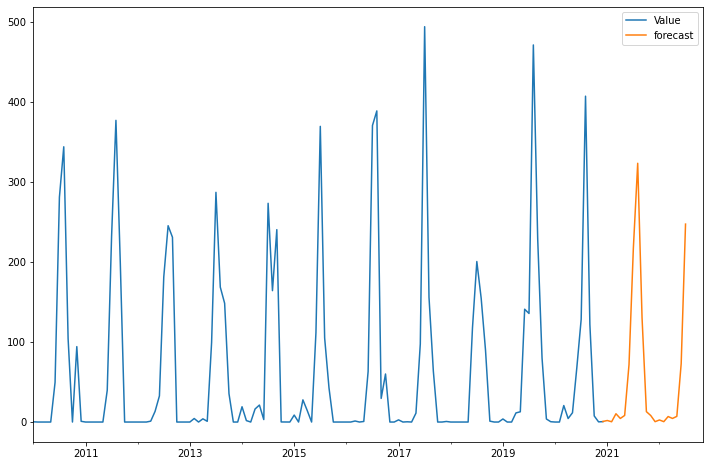

In [53]:
future_df['forecast'] = results.predict(start = 131, end = 150, dynamic= True)  
future_df[['Value', 'forecast']].plot(figsize=(12, 8))